# Exercice 1 : Retour TD1 (Dégradation enzymatique)

### Q1) 

On a $M=\pmatrix{-1 & 1 & 0\\
                 -1 & 1 & 1\\
                 1 & -1 & -1\\
                 0 & 0 & 1}$,
      donc $^T\!M=\pmatrix{-1 & -1 & 1 & 0\\
                           1 & 1 & -1 & 0\\
                           0 & 1 & -1 & 1}$
                         
Cherchons $v=(s, e, c, p)$ tel que $^T\!M^T\!v=0$. Pour cela, utilisons le pivot de Gauss :

$^T\!M=\pmatrix{-1 & -1 & 1 & 0\\
                1 & 1 & -1 & 0\\
                0 & 1 & -1 & 1}
 \xrightarrow[\matrix{\ell_2\leftarrow\ell_2+\ell_1}]{}
 \pmatrix{-1 & -1 & 1 & 0\\
          0 & 0 & 0 & 0\\
          0 & 1 & -1 & 1}$

On a alors le système suivant : $\begin{cases} 
-s-e+c &=& 0\\
e-c+p &=& 0
\end{cases}$

Les variables non-pivots sont $c, p$, nous avons donc 2 cas à étudier :
- $c=1, p=0$ : $\begin{cases}-s-e+1 &=& 0\\e-1 &=& 0\end{cases}\implies\begin{cases}s &=& 0\\e &=& 1\end{cases}$
- $c=0, p=1$ : $\begin{cases}-s-e &=& 0\\e+1 &=& 0\end{cases}\implies\begin{cases}s &=& 1\\e &=& -1\end{cases}$


On a donc les 3 lois de conservations suivantes :
- $E+C$
- $S-E+P$

-----
### Q2) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.matrices import Matrix

M = np.array([[-1, 1, 0],
              [-1, 1, 1],
              [1, -1, -1],
              [0, 0, 1]])

print("Avec le module sympy :")
sympyM = Matrix(M)
symb_cs = sympyM.transpose().nullspace()
print(symb_cs)

Avec le module sympy :
[Matrix([
[0],
[1],
[1],
[0]]), Matrix([
[ 1],
[-1],
[ 0],
[ 1]])]


------
### Q3) 

In [2]:
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve

# On simule les réactions
# E+S -k1-> C
# C -k_1-> E+S
# C -k2-> E+P

s0, e0, c0, p0, k1, k_1, k2, S0, E0, C0, P0 = \
symbols("s0, e0, c0, p0, k1, k_1, k2, S0, E0, C0, P0", real=True)

sys = [S0-50, E0-10, C0-0, P0-0, # conditions initiale
       k1-10, k_1-5, k2-8,
       e0+c0-(E0+C0), # loi conservation 1
       s0-e0+p0-(S0-E0+P0), # loi conservation 2
       -k1*e0*s0+k_1*c0,
       -k1*e0*s0+k_1*c0+k2*c0,
       k1*e0*s0-k_1*c0-k2*c0,
       k2*c0]

# On lance le solveur
sols = nonlinsolve(sys, [s0, e0, c0, p0, S0, E0, C0, P0, k1, k_1, k2])
print(list(sols)[0][:4])

(0, 10, 0, 50)


On a donc :
- $\displaystyle\lim_{t\to\infty}S(t)=0$
- $\displaystyle\lim_{t\to\infty}E(t)=10$
- $\displaystyle\lim_{t\to\infty}C(t)=0$
- $\displaystyle\lim_{t\to\infty}P(t)=50$

# Exercice 2 : Gène autorégulé

### Q1)  

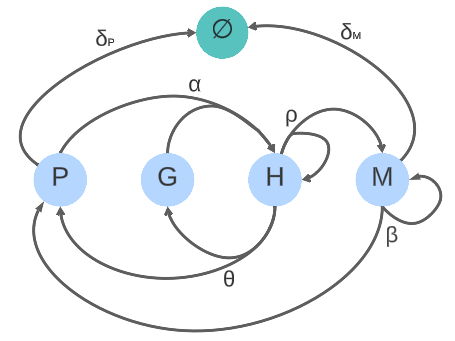

------
### Q2)

Non, car on peut voir que P est dégradé et n'est pas régéneré.

------
### Q3)



-------
### Q4)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, fixed

# On simule les équations 
# P+G -a-> H
# H -t-> P+G
# H -r-> H+M
# M -b-> M+P
# P -dp-> 0
# M -dm-> 0

def f(X, t, a, th, r, b, dp, dm):
    P, G, H, M = X[0], X[1], X[2], X[3]
    return [-(a*P*G)+(th*H)+(b*M)-(dp*P), 
            -(a*P*G)+(th*H),
            (a*P*G)-(th*H),
            (r*H)-(dm*M)]

def plot_graph(f, P0, G0, H0, M0, alpha, theta, rho, beta, delta_p, delta_m):
    t_max = 5
    X0 = [P0, G0, H0, M0] # conditions initiale P,G,H,M
    N = 100
    tvals = np.linspace(0, t_max, N+1)
    K = (alpha, theta, rho, beta, delta_p, delta_m)

    Xvals = odeint(f, X0, tvals, args=K)

    plt.figure(figsize=(10,5))
    plt.plot(tvals, Xvals, label=["P","G","H","M"])
    plt.xlabel("t")
    plt.ylabel("Concentration")
    plt.grid()
    plt.legend(loc='right')
    plt.show()
    plt.close()

interact(
    plot_graph,
    f = fixed(f),
    P0 = (0,20,1),
    G0 = (0,20,1),
    H0 = (0,20,1),
    M0 = (0,20,1),
    alpha = (0,20,0.5),
    theta = (0,20,0.5),
    rho = (0,20,0.5),
    beta = (0,20,0.5),
    delta_p = (0,20,0.5),
    delta_m = (0,20,0.5)
)

interactive(children=(IntSlider(value=10, description='P0', max=20), IntSlider(value=10, description='G0', max…

<function __main__.plot_graph(f, P0, G0, H0, M0, alpha, theta, rho, beta, delta_p, delta_m)>

-------
### Q5)

$\begin{cases}
P'(t) &=& -\alpha (PG)(t)+\theta H(t)+\beta M(t)-\delta_p P(t)\\
G'(t) &=& -\alpha (PG)(t)+\theta H(t)\\
H'(t) &=& \alpha (PG)(t)-\theta H(t)\\
M'(t) &=& \rho H(t)-\delta_m M(t)
\end{cases}$

---------
### Q6)

---------
### Q7)